Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Number of metagenomes = 6
column labels = ['Site s', 'Site s', 'Site s', 'Site s', 'Site s', 'Site s']
Total counts for each metagenone:  [38228, 18354, 21353, 11919, 18447, 17611]


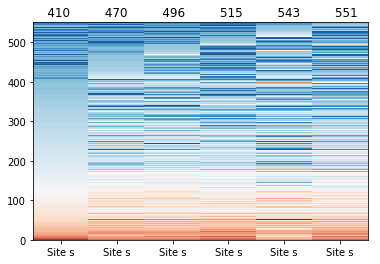

In [ ]:
# for making heat maps

numprocess = 410  # the max(cumulative taxa frq) that sums to 95%
import math
from google.colab import drive
drive.mount('/content/gdrive')

files = ['/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Site1.Loop1.TRANSPOSED.csv',
         '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Site2.Loop3.TRANSPOSED.csv',
         '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Site3.Loop2.TRANSPOSED.csv',
         '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Site4.Loop1.TRANSPOSED.csv',
         '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Site5.Loop3.TRANSPOSED.csv',
         '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Site6.Loop2.TRANSPOSED.csv']
nummetas =  len(files)
dataset = str(nummetas)

mglabel =[]
for x in range(len(files)):
  mglabel.append('Site ' + files[x][74:75])

stringmetas =[]
for x in range(nummetas):   # for reading files and converting each taxon to a list of [taxon, number]
  with open(files[x], 'r') as f:
    data = f.read()
    #print(repr(data)[:100])
    stringmetas.append(str(data))
  f.close()
print('Number of metagenomes =', len(stringmetas))
print( 'column labels =', mglabel)

cleanmetas =[]            # gets rid of unwanted test, converts number from string to integer
for x in range(nummetas):
  datastring = stringmetas[x].replace('unclassified (derived from ', '').replace(')', '').replace('Candidatus ', '')
  metalines = datastring.split('\n')
  metalines.pop()
  integermeta =[]
  for y in range(len(metalines)):
    row = metalines[y].split(',')
    integermeta.append([row[0], int(row[1]), -0.00001])
  cleanmetas.append(integermeta)

totalslist =[]             # counts the total number of taxa in each metagenome
for x in range(nummetas):
  count =0
  for y in range(len(cleanmetas[x])):
    count += cleanmetas[x][y][1]
  totalslist.append(count)
print('Total counts for each metagenone: ', totalslist)

for x in range(nummetas):
  for y in range(len(cleanmetas[x])):
    cleanmetas[x][y][2] = cleanmetas[x][y][1] / totalslist[x]

for x in range(len(cleanmetas)):
  cleanmetas[x].sort(key = lambda x: x[2])
  cleanmetas[x].reverse()

taxonlist =[]
taxonset = set()
toplabels =''
for x in range(len(cleanmetas)):
  for y in range(numprocess):
    if cleanmetas[x][y][0] not in taxonset:
      taxonset.add(cleanmetas[x][y][0])
      taxonlist.append(cleanmetas[x][y][0])
  #print('Number of taxa after combining', x+1, 'metagenomes =', len(taxonlist))
  toplabels += ('     ' + str(len(taxonlist)) + '    ')
 
table =[]
row_labels =[]
for w in range(len(taxonlist)):
  row =[]
  for x in range(nummetas):
    row.append(4.3)
  for y in range(len(cleanmetas)):
    for z in range(len(cleanmetas[y])):
      if cleanmetas[y][z][0] == taxonlist[w]:
        #row[y] = (cleanmetas[y][z][2])  
        row[y] = -1 * math.log(cleanmetas[y][z][2], 10)  
  table.append(row)
"""
for x in range (510, 555):
  print(table[x])
"""
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

plt.title(toplabels)
df = DataFrame(table, columns= mglabel) #, index= row_labels, columns= column_labels)
plt.pcolor(df, cmap= 'RdBu')  #RdBu_r, spring, autumn, Reds, plasma, RdPu, Purples
#plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

plt.show() 
